Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [60]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train, 
                                        labels='inferred',
                                       batch_size=batch_size,
    image_size=(img_height, img_width),
    #shuffle=True,
    seed=123,
    validation_split = 0.2,
    subset = "training",
    label_mode = "categorical")

train_ds

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [61]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train, 
                                        labels='inferred',
                                       batch_size=batch_size,
    image_size=(img_height, img_width),
    #shuffle=True,
    seed=123,
    validation_split = 0.2,
    subset = "validation",
    label_mode = "categorical")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [62]:
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.utils.image_dataset_from_directory(data_dir_test, 
                                        labels='inferred',
                                       batch_size=batch_size,
    image_size=(img_height, img_width),
    #shuffle=True,
    seed=123,
    label_mode = "categorical")

Found 118 files belonging to 9 classes.


In [63]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### understanding tf structure

In [53]:
for images, labels in train_ds.take(1):  # only take first element of dataset, -1 returns all the elements
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    
    numpy_images.shape
    numpy_labels.shape

(32, 180, 180, 3)

(32, 9)

2024-05-08 11:32:57.839411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [53]:
#Get one instance for each class label
type(train_ds)
print(f'length of train_ds {len(train_ds)}')
all_instances = {}

#each item in train_ds is of size 32
print(len(train_ds) * batch_size)

for batch, class_label in train_ds:
    #print(f'shape of batch {batch.shape}')
    #print(f'shape of class_label is {class_label.shape}')
    
    for image, label in zip(batch, class_label):
        #print(f'shape of image {image.shape}')
        #print(f'image class label is {label}')
        
        l = np.array(class_names)[np.where(label == 1)]
        all_instances[l[0]] = image

    
    if (len(all_instances) == len(class_names)):
        break

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

length of train_ds 169
5408


<Axes: >

(0.0, 1.0, 0.0, 1.0)

'seborrheic keratosis'

Text(0.5, 1.0, 'seborrheic keratosis')

<Axes: >

(0.0, 1.0, 0.0, 1.0)

'dermatofibroma'

Text(0.5, 1.0, 'dermatofibroma')

<Axes: >

(0.0, 1.0, 0.0, 1.0)

'basal cell carcinoma'

Text(0.5, 1.0, 'basal cell carcinoma')

<Axes: >

(0.0, 1.0, 0.0, 1.0)

'squamous cell carcinoma'

Text(0.5, 1.0, 'squamous cell carcinoma')

<Axes: >

(0.0, 1.0, 0.0, 1.0)

'actinic keratosis'

Text(0.5, 1.0, 'actinic keratosis')

<Axes: >

(0.0, 1.0, 0.0, 1.0)

'vascular lesion'

Text(0.5, 1.0, 'vascular lesion')

<Axes: >

(0.0, 1.0, 0.0, 1.0)

'nevus'

Text(0.5, 1.0, 'nevus')

<Axes: >

(0.0, 1.0, 0.0, 1.0)

'melanoma'

Text(0.5, 1.0, 'melanoma')

<Axes: >

(0.0, 1.0, 0.0, 1.0)

'pigmented benign keratosis'

Text(0.5, 1.0, 'pigmented benign keratosis')

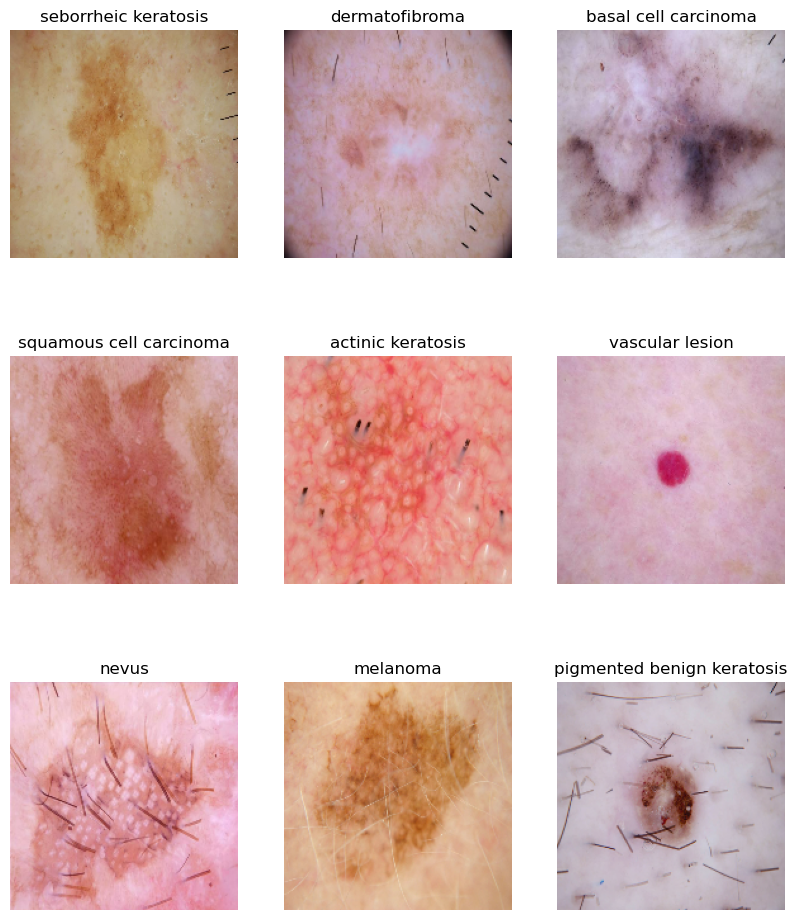

In [54]:
fig = plt.figure(figsize=(10, 12))
num_rows = 3
num_cols = 3

position = 1
#colors = plt.rcParams["axes.prop_cycle"]()

for label, image in all_instances.items() :
    fig.add_subplot(num_rows, num_cols, position)
    position = position + 1    
    plt.axis("off")
    label
    plt.title(label)
    arr_ = np.squeeze(image).astype('uint8')
    plt.imshow(arr_)
    
plt.show()

## how do i get file path???

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [55]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [64]:
### Your code goes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.regularizers import l2

base_model = Sequential()

base_model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

base_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_height, img_height, 3)))
base_model.add(Activation('relu'))
base_model.add(BatchNormalization())
base_model.add(Conv2D(32, (3, 3)))
base_model.add(Activation('relu'))
base_model.add(BatchNormalization())
base_model.add(MaxPooling2D(pool_size=(2, 2)))
base_model.add(Dropout(0.25))

base_model.add(Conv2D(64, (3, 3), padding='same'))
base_model.add(Activation('relu'))
base_model.add(BatchNormalization())
base_model.add(Conv2D(64, (3, 3)))
base_model.add(Activation('relu'))
base_model.add(BatchNormalization())
base_model.add(MaxPooling2D(pool_size=(2, 2)))
base_model.add(Dropout(0.25))

base_model.add(Flatten())
base_model.add(Dense(512,kernel_regularizer=l2(0.01)))
base_model.add(Activation('relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(len(class_names)))
base_model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [65]:
### Todo, choose an appropirate optimiser and loss function
base_model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [66]:
# View the summary of all layers
base_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 180, 180, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 178, 178, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 89, 89, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 87, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    60,588,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │         4,617 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 9)              │             

 Total params: 60,659,497 (231.40 MB)

 Trainable params: 60,659,113 (231.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Train the model

In [ ]:
epochs = 20
base_model_history = base_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.2457 - loss: 22.6853 - val_accuracy: 0.1544 - val_loss: 16.2933
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3859 - loss: 11.7760 - val_accuracy: 0.1499 - val_loss: 22.8781
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4447 - loss: 11.4557 - val_accuracy: 0.1790 - val_loss: 20.6621
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5113 - loss: 11.0683 - val_accuracy: 0.2394 - val_loss: 17.1558
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5253 - loss: 10.8039 - val_accuracy: 0.2931 - val_loss: 16.6623
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5618 - loss: 10.4683 - val_accuracy: 0.3423 - val_loss: 14.8782
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5659 - loss: 10.2304 - val_accuracy: 0.3893 - val_loss: 12.3391
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.5891 - loss: 10.0281 - val_accuracy: 0.4

### Visualizing training results

<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Training and Validation Accuracy')

<Axes: >

Text(0.5, 1.0, 'Training and Validation Loss')

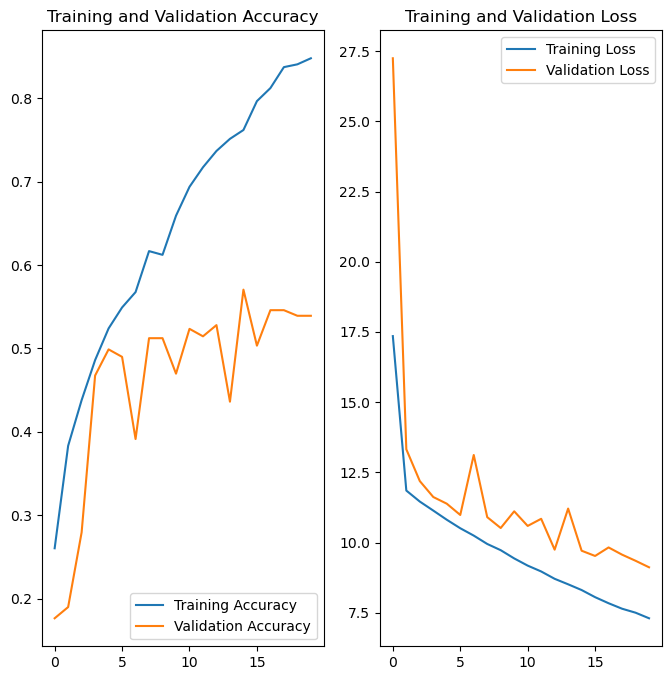

In [54]:
acc = base_model_history.history['accuracy']
val_acc = base_model_history.history['val_accuracy']

loss = base_model_history.history['loss']
val_loss = base_model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
### model eveluation on test data
base_model.evaluate(test_ds)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### it seems to be overfitting as there is a large gap between test and training accuracy even after using dropouts

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
label_indexes =  np.array([])
for x, y in train_ds:
  # this if your labels are one-hot encoded
  label_indexes = np.concatenate([label_indexes, np.argmax(y.numpy(), axis=-1)]).astype('uint8')

for x, y in val_ds:
  # this if your labels are one-hot encoded
  label_indexes = np.concatenate([label_indexes, np.argmax(y.numpy(), axis=-1)]).astype('uint8')
    
len(label_indexes)

#create another array with actual class names
labels = [class_names[x] for x in label_indexes]
plt.hist(labels)
plt.xticks(rotation = 90)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? 
    - seborrheic keratosis has only 78 samples
#### - Which classes dominate the data in terms proportionate number of samples? 
    - pigmented benign keratosis, basal cell carcinoma, vascular lesion and melanoma 


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

In [9]:
!pip install Augmentor

  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [13]:
path_to_training_dataset= pathlib.Path("/Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x31A69DD50>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x31853F650>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3182418D0>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 357 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x318593350>: 100%|


Initialised with 462 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x31A6F7510>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x31A6D9BD0>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3


Initialised with 139 image(s) found.
Output directory set to /Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [14]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [20]:
from glob import glob

### Lets see the distribution of augmented data after adding new images to the original training data.

In [22]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000428.jpg_40631f97-fab2-44fd-93c7-1e6152645164.jpg',
 '/Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010550.jpg_e2465c16-6e58-40da-bd8d-31c06682b1a0.jpg',
 '/Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000296.jpg_b51aed83-ea74-4820-9ce7-04486b992348.jpg',
 '/Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection A

In [23]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [45]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [47]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.head()

,Path,Label
0,/Users/mannam.sriram/Documents/personal/EXPG/N...,melanoma
1,/Users/mannam.sriram/Documents/personal/EXPG/N...,melanoma
2,/Users/mannam.sriram/Documents/personal/EXPG/N...,melanoma
3,/Users/mannam.sriram/Documents/personal/EXPG/N...,melanoma
4,/Users/mannam.sriram/Documents/personal/EXPG/N...,melanoma


In [48]:
df2['Label'].value_counts()

Label
melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [25]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [39]:
data_dir_train=pathlib.Path("/Users/mannam.sriram/Documents/personal/EXPG/NeuralNetworks/CNN/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

train_ds_aug = tf.keras.utils.image_dataset_from_directory(data_dir_train, 
                                        labels='inferred',
                                       batch_size=batch_size,
    image_size=(img_height, img_width),
    #shuffle=True,
    seed=123,
    validation_split = 0.2,
    subset = "training",
    label_mode = "categorical")

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [40]:
val_ds_aug = tf.keras.utils.image_dataset_from_directory(data_dir_train, 
                                        labels='inferred',
                                       batch_size=batch_size,
    image_size=(img_height, img_width),
    #shuffle=True,
    seed=123,
    validation_split = 0.2,
    subset = "validation",
    label_mode = "categorical")

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [41]:
## your code goes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)))

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(img_height, img_height, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [42]:
## your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [43]:
# View the summary of all layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 180, 180, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 178, 178, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 89, 89, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 89, 89, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 87, 87, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    60,588,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         4,617 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 9)              │             

 Total params: 60,659,497 (231.40 MB)

 Trainable params: 60,659,113 (231.40 MB)

 Non-trainable params: 384 (1.50 KB)

#### **Todo:**  Train your model

In [44]:
epochs = 50
history = model.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.2810 - loss: 16.8006 - val_accuracy: 0.0987 - val_loss: 15.0776
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.4669 - loss: 11.0399 - val_accuracy: 0.2970 - val_loss: 12.3656
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.5447 - loss: 10.2213 - val_accuracy: 0.4291 - val_loss: 11.0336
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.6156 - loss: 9.4924 - val_accuracy: 0.4662 - val_loss: 10.3979
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.6559 - loss: 8.8494 - val_accuracy: 0.7261 - val_loss: 8.4046
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.7166 - loss: 8.1938 - val_accuracy: 0.4662 - val_loss: 9.3757
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.7372 - loss: 7.6807 - val_accuracy: 0.2658 - val_loss: 13.6933
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.7645 - loss: 7.2117 - 

#### **Todo:**  Visualize the model results

<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Training and Validation Accuracy')

<Axes: >

Text(0.5, 1.0, 'Training and Validation Loss')

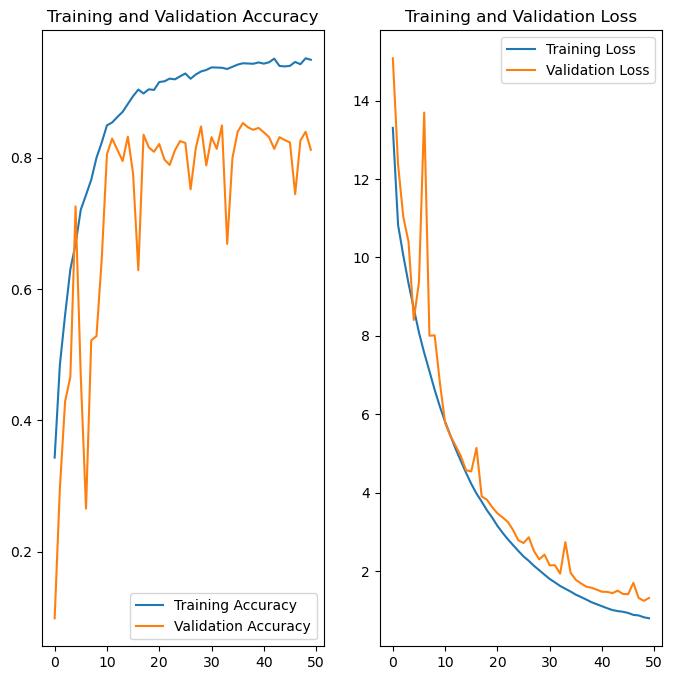

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## After the data augmentation, cross validation accuracy seems to have improved

In [52]:
model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.4138 - loss: 5.2372


[5.094686031341553, 0.4067796468734741]